 Resolving package versions...
  Updating `~/.julia/Project.toml`
 [no changes]
  Updating `~/.julia/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/Project.toml`
 [no changes]
  Updating `~/.julia/Manifest.toml`
 [no changes]

This package has been renamed to StatsPlots.
The name StatPlots has been deprecated.

Please run

`]rm StatPlots`
`]add StatsPlots`

Failure to update will mean that you do not receive new developments.

Number of epochs required: 7404
Time required for training: 0.231986468
Time required for linear search: 0.060902137 seconds
Time required for learned index search: 0.013658198 seconds


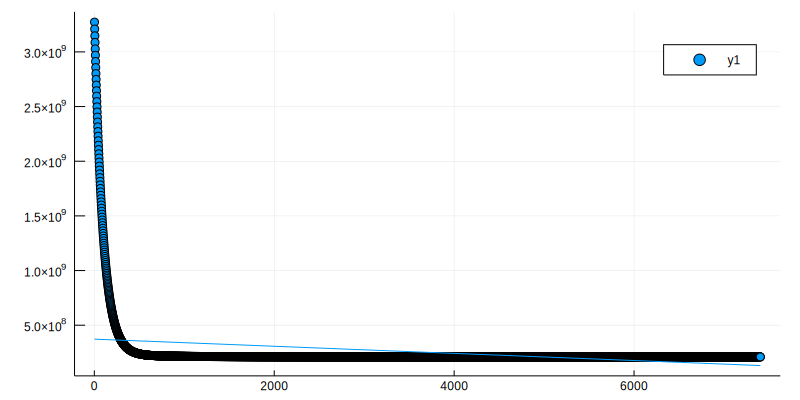

In [1]:
import Base.findall;
import Pkg; 
Pkg.add("StatPlots");
Pkg.add("SpecialFunctions");
using MLDataUtils;
using Knet;
using DataFrames;
using Statistics;
using Plots;
using StatPlots;
using SpecialFunctions;

function generate_dataset(N)
    dataset = [exponential() for i = 1:N]
    dataset = sort(dataset)
    function KVrand()
        x = rand(dataset)
        #y = dataset.index(x)
        y1 = findall(i->i==x,dataset)
        y = y1[1]
        return x, y
    end
    return dataset, KVrand
end

function exponential(lambda1=1.0)
    u = rand()
    x = - log(u) / lambda1
    return x
end

function lognormal(mu=0,sigma=0.5)
    u = rand()
    a = (log(u) - mu)/sqrt(2*sigma^2)
    p = 0.5 + 0.5*erf(a)
    return p
end

function linear_search(x, dataset)
    idx=0
    for n in dataset
        idx = idx+1
        if n > x
            break
        end
    end
    return idx - 1
end

predict(w, x) = w[1] * x .+ w[2];
loss(w, x, y) = mean(abs2, predict(w, x)-y);
lossgradient = grad(loss);

function train(w, data; lr=0.001) 
    for (x,y) in data
        dw = lossgradient(w, x, y)
        for i in 1:length(w)
            w[i] -= dw[i]*lr
        end
    end
    return w
end;

function testlin(x1)
    idx = linear_search(x1, dataset)
    return idx
end

function testPred(x2)
    idx = predict(w, x2)
    return idx
end

N = 100000
LF_x = Float64[]
LF_y = Float64[] 
batch_x = Float64[] 
batch_y = Float64[]

dataset, KVrand = generate_dataset(N)

for j =1:N
x1, y1 = KVrand()
    push!(batch_x, x1)
    push!(batch_y, y1)
end

x = reshape(batch_x, 1, :)
y = reshape(batch_y, 1, :)

function generate_dataset(N)
    dataset = [exponential() for i = 1:N]
    dataset = sort(dataset)
    function KVrand()
        x = rand(dataset)
        #y = dataset.index(x)
        y1 = findall(i->i==x,dataset)
        y = y1[1]
        return x, y
    end
    return dataset, KVrand
end

function exponential(lambda1=1.0)
    u = rand()
    x = - log(u) / lambda1
    return x
end

function lognormal(mu=0,sigma=0.5)
    u = rand()
    a = (log(u) - mu)/sqrt(2*sigma^2)
    p = 0.5 + 0.5*erf(a)
    return p
end

function linear_search(x, dataset)
    idx=0
    for n in dataset
        idx = idx+1
        if n > x
            break
        end
    end
    return idx - 1
end

predict(w, x) = w[1] * x .+ w[2];
loss(w, x, y) = mean(abs2, predict(w, x)-y);
lossgradient = grad(loss);

function train(w, data; lr=0.001) 
    for (x,y) in data
        dw = lossgradient(w, x, y)
        for i in 1:length(w)
            w[i] -= dw[i]*lr
        end
    end
    return w
end;

function testlin(x1)
    idx = linear_search(x1, dataset)
    return idx
end

function testPred(x2)
    idx = predict(w, x2)
    return idx
end

tm = @elapsed w = Any[ 0.1*randn(1,1), 0.0 ];
ld = 1
l = 0
i = 0
#for i=1:10000
while (ld!=0)
    i = i+1
    train(w, [(x,y)])
    if mod(i, 2) == 0
        lp = l
        l = (round(loss(w,x,y)))
        ld = lp-l
        #println("Epoch $i: $l, $ld")
        push!(LF_x, i)
        push!(LF_y, l)
    end
end
println("Number of epochs required: ", i)
println("Time required for training: ", tm)

tm1 = @elapsed for i=1:1000
    x=rand(dataset)
    testlin(x)
end

println("Time required for linear search: ",tm1," seconds")

tm2 = @elapsed for i=1:1000
    x=rand(dataset)
    testPred(x)
end

println("Time required for learned index search: ",tm2," seconds")

gr();
scatter(LF_x, LF_y, layout=(1,1), reg=true, size=(800,400))